<a href="https://colab.research.google.com/github/Kzis/mrt-is/blob/master/Inbound_Support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## for data
import pandas as pd
import numpy as np

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# อ่านข้อมูล

In [2]:
inbound_url = 'https://raw.githubusercontent.com/Kzis/mrt-is/master/Data/Inbound/All_Summary.csv'
inbound_df = pd.read_csv(inbound_url)
inbound_df.head()

,TransactionDate,StationName,PassengerCount,DayType,DateOfWeek,DayNumberOfMonth,MonthPeriod,MonthNumberOfYear,CalendarQuater,Interest_Agriculture,Interest_Books,Interest_Business,Interest_Education,Interest_Family,Interest_Fasion,Interest_Foods,Interest_General,Interest_Health,Interest_IT,Interest_Residence,Interest_Seminar,Interest_Sports,Interest_Travel,Interest_Vehnicle,EventsGroup_Agriculture,EventsGroup_Books,EventsGroup_Business,EventsGroup_Education,EventsGroup_Family,EventsGroup_Fasion,EventsGroup_Foods,EventsGroup_General,EventsGroup_Health,EventsGroup_IT,EventsGroup_Residence,EventsGroup_Seminar,EventsGroup_Sports,EventsGroup_Travel,EventsGroup_Vehnicle,Interest_Total,Events_Total
0,2017-01-01,Bang Sue,186,WE,Sunday,1,Early,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2017-01-01,Chatuchak Park,359,WE,Sunday,1,Early,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2017-01-01,Hua Lamphong,299,WE,Sunday,1,Early,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2017-01-01,Huai Khwang,431,WE,Sunday,1,Early,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2017-01-01,Kamphaeng Phet,233,WE,Sunday,1,Early,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
stations_dummies = pd.get_dummies(inbound_df['StationName'])
stations_dummies.head()

,Bang Krasor,Bang Phlu,Bang Rak Noi Tha It,Bang Rak Yai,Bang Son,Bang Sue,Chatuchak Park,Hua Lamphong,Huai Khwang,Kamphaeng Phet,Khlong Bang Phai,Khlong Toei,Lat Phrao,Lumphini,Ministry of Public Health,Nonthaburi Civic Center,Phahon Yothin,Phetchaburi,Phra Nang Klao Bridge,Phra Ram 9,Queen Sirikit National Convention Centre,Ratchadaphisek,Sai Ma,Sam Yaek Bang Yai,Sam Yan,Si Lom,Sukhumvit,Sutthisan,Talad Bang Yai,Tao Poon,Thailand Cultural Centre,Wong Sawang,Yaek Nonthaburi 1,Yaek Tiwanon
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
day_type_dummies = pd.get_dummies(inbound_df['DayType'])
day_type_dummies.head()

,PH,WD,WE
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [5]:
date_of_week_dummies = pd.get_dummies(inbound_df['DateOfWeek'])
date_of_week_dummies.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [6]:
month_period_dummies = pd.get_dummies(inbound_df['MonthPeriod'])
month_period_dummies.head()

,Early,Late,Mid
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [7]:
inbound_df.drop('TransactionDate', axis=1, inplace=True)
inbound_df.drop('StationName', axis=1, inplace=True)
inbound_df.drop('DayType', axis=1, inplace=True)
inbound_df.drop('DateOfWeek', axis=1, inplace=True)
inbound_df.drop('MonthPeriod', axis=1, inplace=True)

In [8]:
inbound_df =pd.concat([inbound_df ,stations_dummies ], axis=1)
inbound_df =pd.concat([inbound_df ,day_type_dummies ], axis=1)
inbound_df =pd.concat([inbound_df ,date_of_week_dummies ], axis=1)
inbound_df =pd.concat([inbound_df ,month_period_dummies ], axis=1)
inbound_df.head()

,PassengerCount,DayNumberOfMonth,MonthNumberOfYear,CalendarQuater,Interest_Agriculture,Interest_Books,Interest_Business,Interest_Education,Interest_Family,Interest_Fasion,Interest_Foods,Interest_General,Interest_Health,Interest_IT,Interest_Residence,Interest_Seminar,Interest_Sports,Interest_Travel,Interest_Vehnicle,EventsGroup_Agriculture,EventsGroup_Books,EventsGroup_Business,EventsGroup_Education,EventsGroup_Family,EventsGroup_Fasion,EventsGroup_Foods,EventsGroup_General,EventsGroup_Health,EventsGroup_IT,EventsGroup_Residence,EventsGroup_Seminar,EventsGroup_Sports,EventsGroup_Travel,EventsGroup_Vehnicle,Interest_Total,Events_Total,Bang Krasor,Bang Phlu,Bang Rak Noi Tha It,Bang Rak Yai,...,Hua Lamphong,Huai Khwang,Kamphaeng Phet,Khlong Bang Phai,Khlong Toei,Lat Phrao,Lumphini,Ministry of Public Health,Nonthaburi Civic Center,Phahon Yothin,Phetchaburi,Phra Nang Klao Bridge,Phra Ram 9,Queen Sirikit National Convention Centre,Ratchadaphisek,Sai Ma,Sam Yaek Bang Yai,Sam Yan,Si Lom,Sukhumvit,Sutthisan,Talad Bang Yai,Tao Poon,Thailand Cultural Centre,Wong Sawang,Yaek Nonthaburi 1,Yaek Tiwanon,PH,WD,WE,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Early,Late,Mid
0,186,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,359,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,299,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,431,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,233,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [9]:
inbound_df.shape

(8864, 83)

In [10]:
inbound_df.columns

Index(['PassengerCount', 'DayNumberOfMonth', 'MonthNumberOfYear',
       'CalendarQuater', 'Interest_Agriculture', 'Interest_Books',
       'Interest_Business', 'Interest_Education', 'Interest_Family',
       'Interest_Fasion', 'Interest_Foods', 'Interest_General',
       'Interest_Health', 'Interest_IT', 'Interest_Residence',
       'Interest_Seminar', 'Interest_Sports', 'Interest_Travel',
       'Interest_Vehnicle', 'EventsGroup_Agriculture', 'EventsGroup_Books',
       'EventsGroup_Business', 'EventsGroup_Education', 'EventsGroup_Family',
       'EventsGroup_Fasion', 'EventsGroup_Foods', 'EventsGroup_General',
       'EventsGroup_Health', 'EventsGroup_IT', 'EventsGroup_Residence',
       'EventsGroup_Seminar', 'EventsGroup_Sports', 'EventsGroup_Travel',
       'EventsGroup_Vehnicle', 'Interest_Total', 'Events_Total', 'Bang Krasor',
       'Bang Phlu', 'Bang Rak Noi Tha It', 'Bang Rak Yai', 'Bang Son',
       'Bang Sue', 'Chatuchak Park', 'Hua Lamphong', 'Huai Khwang',
       'Kampha

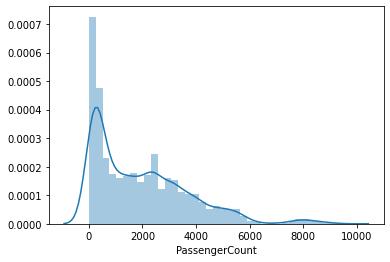

In [11]:
sns.distplot(inbound_df['PassengerCount'])

# Training

In [12]:
y = inbound_df['PassengerCount']
inbound_df.drop('PassengerCount', axis=1, inplace=True)
X = inbound_df

In [13]:
X.head()

,DayNumberOfMonth,MonthNumberOfYear,CalendarQuater,Interest_Agriculture,Interest_Books,Interest_Business,Interest_Education,Interest_Family,Interest_Fasion,Interest_Foods,Interest_General,Interest_Health,Interest_IT,Interest_Residence,Interest_Seminar,Interest_Sports,Interest_Travel,Interest_Vehnicle,EventsGroup_Agriculture,EventsGroup_Books,EventsGroup_Business,EventsGroup_Education,EventsGroup_Family,EventsGroup_Fasion,EventsGroup_Foods,EventsGroup_General,EventsGroup_Health,EventsGroup_IT,EventsGroup_Residence,EventsGroup_Seminar,EventsGroup_Sports,EventsGroup_Travel,EventsGroup_Vehnicle,Interest_Total,Events_Total,Bang Krasor,Bang Phlu,Bang Rak Noi Tha It,Bang Rak Yai,Bang Son,...,Hua Lamphong,Huai Khwang,Kamphaeng Phet,Khlong Bang Phai,Khlong Toei,Lat Phrao,Lumphini,Ministry of Public Health,Nonthaburi Civic Center,Phahon Yothin,Phetchaburi,Phra Nang Klao Bridge,Phra Ram 9,Queen Sirikit National Convention Centre,Ratchadaphisek,Sai Ma,Sam Yaek Bang Yai,Sam Yan,Si Lom,Sukhumvit,Sutthisan,Talad Bang Yai,Tao Poon,Thailand Cultural Centre,Wong Sawang,Yaek Nonthaburi 1,Yaek Tiwanon,PH,WD,WE,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Early,Late,Mid
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [14]:
y.head()

0    186
1    359
2    299
3    431
4    233
Name: PassengerCount, dtype: int64

In [15]:
X.shape


(8864, 82)

In [16]:
y.shape

(8864,)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import metrics

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [19]:
print("X_train size : {}".format(X_train.shape))
print("X_test size : {}".format(X_test.shape))
print("y_train size : {}".format(y_train.shape))
print("y_test size : {}".format(y_test.shape))

X_train size : (6204, 82)
X_test size : (2660, 82)
y_train size : (6204,)
y_test size : (2660,)


In [31]:
regressor = SVR(kernel='linear')
regressor.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [32]:
y_pred = regressor.predict(X_test)

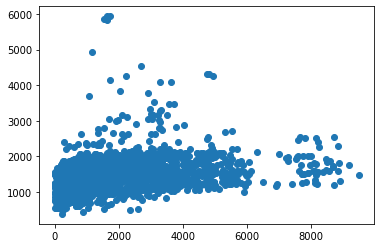

In [41]:
plt.scatter(y_test,y_pred)


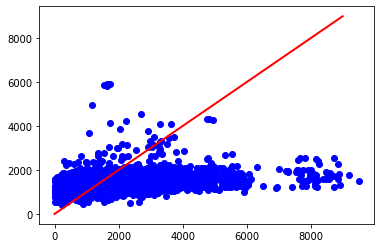

In [42]:
plt.scatter(y_test, y_pred,  color='blue')
plt.plot(range(0,9000), range(0,9000), color='red', linewidth=2)
plt.show()

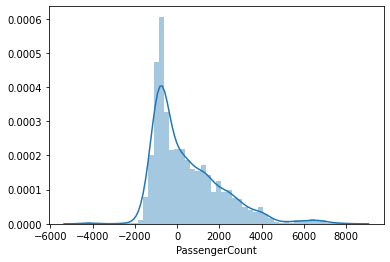

In [43]:
sns.distplot(y_test-y_pred, bins=50)


In [44]:
metrics.mean_absolute_error(y_test, y_pred)


1250.6275524310013

In [45]:
metrics.mean_squared_error(y_test, y_pred)


2969024.9919470395

In [46]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))


1723.0858922140358

In [47]:
def mean_absolute_percentage_error(y_true, y_pred): 
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  
mean_absolute_percentage_error(y_test, y_pred)

574.981868883155

In [48]:
from scipy import stats
x = np.array([y_test, y_pred])
stats.median_absolute_deviation(x, axis=None)

844.0652800486772